In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
# 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson 
# distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the 
# probability of cars waiting at the drive-up window.

cars = stats.poisson(2)

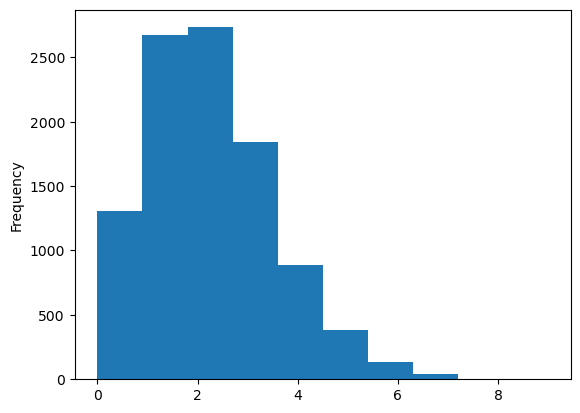

In [62]:
pd.Series(cars.rvs(10_000)).plot.hist(bins=10);

In [10]:
# What is the probability that no cars drive up in the noon hour?

cars.pmf(0) #probability of one, discrete value, use pmf

0.1353352832366127

In [11]:
# What is the probability that 3 or more cars come through the drive through?

cars.sf(2) #probability of multiple values, greater than, use sf

0.32332358381693654

In [12]:
# How likely is it that the drive through gets at least 1 car?

cars.sf(0)

0.8646647167633873

In [14]:
# 2. # Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation 
# of .3. Calculate the following:

# What grade point average is required to be in the top 5% of the graduating class?

mean = 3
sd = .3

grades = stats.norm(mean, sd)

grades.isf(.05)

3.4934560880854417

In [15]:
# What GPA constitutes the bottom 15% of the class?

grades.ppf(.15)

2.689069983151863

In [68]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

grades.ppf(.2), grades.ppf(.3)

# Yes, as the third decile range is 2.74-2.84, a student with a 2.8 GPA would qualify for the scholarship.

(2.7475136299281258, 2.842679846187588)

In [90]:
# If I have a GPA of 3.5, what percentile am I in?

grades.cdf(3.5)

# You are in the 95th percentile.

0.9522096477271853

In [92]:
# 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 
# click-throughs. How likely is it that this many people or more click through?

stats.binom(4326, .02).sf(96) # 4326 trials with a .02 chance of "success." Then find possibility of 97 or more clickthroughs.

0.13975823631416445

In [63]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a 
# probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the 
# answer to each question.

# What is the probability that at least one of your first 60 answers is correct?

stats.binom(60, .01).sf(0)

0.45284335760923855

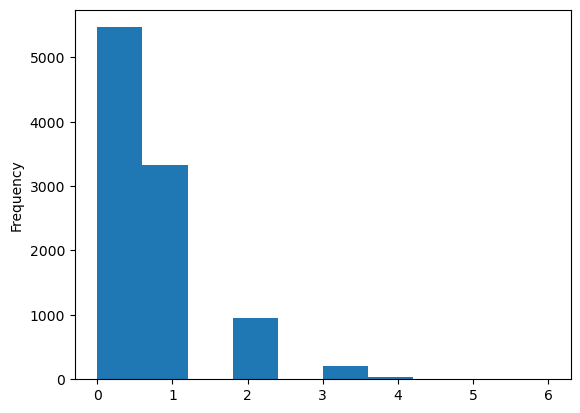

In [69]:
pd.Series(stats.binom(60, .01).rvs(10_000)).plot.hist(bins=10);

In [28]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance 
# that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active 
# cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

stats.poisson(1.78).sf(0)


0.8313618527314045

In [89]:
# How likely is it that it goes two days without getting cleaned up? 

stats.poisson((1.78*2)).pmf(0)

0.028438824714184505

In [88]:
# All week?

stats.poisson((1.78*5)).pmf(0)

0.0001363889264820114

In [79]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line when your lunch 
# break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each 
# person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 
# 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and 
# ignore travel time to and from La Panaderia.

mean_minutes = 30 # 15 people and 2 minutes per person
sd_minutes = 6    # 3 people, times two per person, equaling 6 min

stats.norm(mean_minutes, sd_minutes).cdf(33) # 33 is taken from the hour (60 mins), minus order, wait, and eating time
                                             # 60 - 15 - 10 - 2 = 33 mins that you need available
    
# cdf because you want the probability that it takes *up to* (i.e. cumulative) 33 min to get through the line.
    
# 69.14% chance

0.6914624612740131

In [70]:
# 7. Connect to the employees database and find the average salary of current employees, along with the standard 
# deviation. For the following questions, calculate the answer based on modeling the employees salaries with a 
# normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual 
# values present in the salaries dataset.

from env import get_db_url

url = get_db_url('employees')

salaries = pd.read_sql('SELECT * FROM salaries WHERE to_date > NOW()', url)

In [71]:
salary_dist = stats.norm(salaries.salary.mean(), salaries.salary.std())

In [72]:
# What percent of employees earn less than 60,000?

salary_dist.cdf(60000)

0.24385742480214423

In [73]:
# What percent of employees earn more than 95,000?

salary_dist.sf(95000)

0.09208819199804053

In [74]:
# What percent of employees earn between 65,000 and 80,000?

salary_dist.cdf(80000) - salary_dist.cdf(65000) # removes lower bound up to 65000

0.3350605685446666

In [75]:
# What do the top 5% of employees make?

salary_dist.isf(.05)

100484.64454102777